<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BA/blob/main/BA_CE_TAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diplomatura en **Business Analytics** - FCEJ/UdA - **Caso de Estudio**
***Impuestos y Deducciones de Australia***

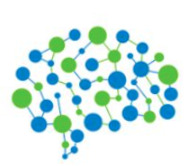

## Carga de librerías necesarias

In [15]:
import pandas as pd
import numpy as np
import altair as alt
from sklearn.cluster import KMeans

## Extracción de Datos - Creación del DataFrame

In [2]:
datos_url = "https://raw.githubusercontent.com/cristiandarioortegayubro/BA/main/Tax.csv"

Se realiza un análisis de agrupación en este conjunto de datos para dos variables específicas (o columnas): Average net tax y Average total deductions. El objetivo es encontrar grupos (o subgrupos) de códigos postales que compartan patrones similares en términos de impuestos y deducciones. 

In [3]:
impuestos = pd.read_csv(datos_url, usecols=['Postcode', 'Average net tax', 'Average total deductions'])
impuestos

,Postcode,Average total deductions,Average net tax
0,2000,2071,27555
1,2006,3804,28142
2,2007,1740,15649
3,2008,3917,53976
4,2009,3433,32430
...,...,...,...
2468,870,2377,14788
2469,872,1218,9017
2470,880,2309,16574
2471,885,3039,28795


In [4]:
impuestos.rename(columns={"Average total deductions":"Average_total_deductions"}, inplace=True)
impuestos.rename(columns={"Average net tax":"Average_net_tax"}, inplace=True)

### Tipos de datos del DataFrame y tamaño

In [5]:
impuestos.shape

(2473, 3)

In [6]:
impuestos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2473 entries, 0 to 2472
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Postcode                  2473 non-null   int64
 1   Average_total_deductions  2473 non-null   int64
 2   Average_net_tax           2473 non-null   int64
dtypes: int64(3)
memory usage: 58.1 KB


In [7]:
impuestos.Average_net_tax.describe()

count     2473.000000
mean     15857.382936
std       7915.109176
min       5879.000000
25%      11315.000000
50%      13618.000000
75%      17845.000000
max      90485.000000
Name: Average_net_tax, dtype: float64

In [8]:
impuestos.Average_total_deductions.describe()

count     2473.000000
mean      2682.669632
std       1236.193614
min        629.000000
25%       2120.000000
50%       2440.000000
75%       2877.000000
max      25472.000000
Name: Average_total_deductions, dtype: float64

# Modelo de Agrupación

## Desarrollo del modelo

In [9]:
kmeans = KMeans(random_state=100)

In [10]:
X = impuestos[["Average_net_tax", "Average_total_deductions"]]

In [11]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [12]:
y_preds = kmeans.predict(X)
y_preds

array([5, 5, 0, ..., 0, 5, 0], dtype=int32)

In [13]:
impuestos["Cluster"] = y_preds
impuestos

,Postcode,Average_total_deductions,Average_net_tax,Cluster
0,2000,2071,27555,5
1,2006,3804,28142,5
2,2007,1740,15649,0
3,2008,3917,53976,7
4,2009,3433,32430,1
...,...,...,...,...
2468,870,2377,14788,6
2469,872,1218,9017,2
2470,880,2309,16574,0
2471,885,3039,28795,5


In [14]:
impuestos.pivot_table(values=["Average_total_deductions", "Average_net_tax"], index="Cluster", aggfunc=np.mean)

,Average_net_tax,Average_total_deductions
Cluster,,
0,16532.285398,2658.820796
1,36197.407895,4789.328947
2,10229.592246,2185.070856
3,20529.511945,2911.440273
4,77733.111111,12523.111111
5,26765.963235,3498.676471
6,13181.420191,2499.825375
7,50887.692308,6156.961538


In [17]:
scatter_plot = alt.Chart(impuestos).mark_circle()

In [20]:
scatter_plot.encode(x="Average_total_deductions", y="Average_net_tax", color="Cluster:N", tooltip=["Postcode", "Cluster", "Average_total_deductions", "Average_net_tax"]).interactive()

alt.Chart(...)